In [1]:
import numpy as np
import matplotlib.pyplot as plt
# test 1D diffusion using devito

In [2]:
from devito import Grid, Function, TimeFunction, Eq, Operator, Constant
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx, ny = 50, 50  # Grid size
dx, dy = 10.0, 10.0  # Grid spacing
nt = 1000  # Number of timesteps
dt = 1.0  # Time step
alpha = Constant(name="alpha", value=1e-4)  # Diffusivity coefficient

# Create a grid
grid = Grid(shape=(nx, ny), extent=(nx*dx, ny*dy))


In [3]:
# Define time-varying pressure field
p = TimeFunction(name="p", grid=grid, time_order=1, space_order=2)

# Define the pressure diffusion equation
# Pressure diffusion equation: dP/dt = alpha * (d^2P/dx^2 + d^2P/dy^2)
pde = Eq(p.forward, p + dt * alpha * (p.dx2 + p.dy2))

# Set initial conditions: a localized source in the middle
p.data[0, :, :] = 0.0  # Initialize entire field to zero
p.data[0, nx//2, ny//2] = 1.0  # Set point source

# Create and execute the operator
op = Operator(pde)
op.apply(time=nt-1, dt=dt)

Operator `Kernel` ran in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.000718000000000011, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

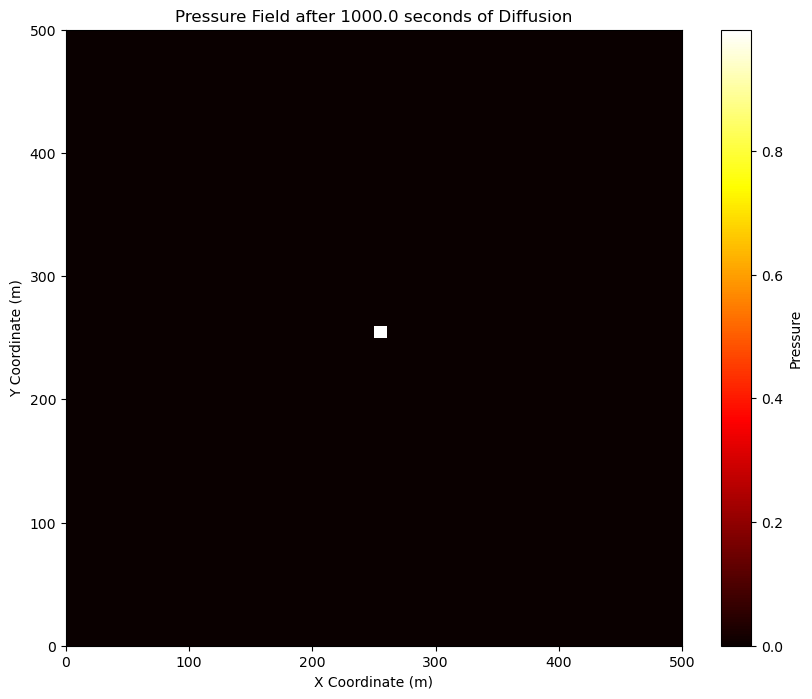

In [4]:
# Plot the pressure field at the final time step
plt.figure(figsize=(10, 8))
plt.imshow(p.data[-1], extent=[0, nx*dx, 0, ny*dy], origin='lower', cmap='hot')
plt.colorbar(label='Pressure')
plt.xlabel('X Coordinate (m)')
plt.ylabel('Y Coordinate (m)')
plt.title(f'Pressure Field after {nt*dt} seconds of Diffusion')
plt.show()

In [19]:
from devito import Grid, Function, TimeFunction, Eq, Operator, Constant
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx = 100  # Number of grid points
dx = 1.0  # Grid spacing
nt = 1000  # Number of timesteps
dt = 0.1  # Time step
alpha = Constant(name="alpha", value=1e-2)  # Diffusivity coefficient

# Create a 1D grid
grid = Grid(shape=(nx,), extent=(nx*dx,))

# Define time-varying pressure field with save=nt to store all timesteps
p = TimeFunction(name="p", grid=grid, time_order=1, space_order=2, save=nt)

# Define the 1D pressure diffusion equation
pde = Eq(p.forward, p + dt * alpha * p.dx2)

# Set initial conditions: a localized source in the middle
p.data[0, :] = 0.0  # Initialize entire field to zero
p.data[0, nx//2] = 1.0  # Set point source

# Create and execute the operator
op = Operator(pde)
op.apply(time=nt-1, dt=dt)

# Create space-time plot
plt.figure(figsize=(10, 8))
plt.imshow(p.data, 
           aspect='auto',
           extent=[0, nx*dx, (nt-1)*dt, 0],  # Note: time axis is flipped for better visualization
           cmap='viridis')
plt.colorbar(label='Pressure')
plt.xlabel('Position (m)')
plt.ylabel('Time (s)')
plt.title('1D Pressure Diffusion Evolution')
plt.show()

InvalidArgument: OOB detected due to time_M=999

In [ ]:
# Optional: Create an animation of selected timesteps
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(0, nt, 50):  # Plot every 50th timestep
    plt.clf()
    plt.plot(np.linspace(0, nx*dx, nx), p.data[i])
    plt.ylim(0, 1)
    plt.xlabel('Position (m)')
    plt.ylabel('Pressure')
    plt.title(f'Time: {i*dt:.1f} s')
    plt.grid(True)
    plt.pause(0.1)